In [30]:
import csv

In [31]:
import numpy as np

In [32]:
import matplotlib.pyplot as plt

In [33]:
from sklearn.svm import SVR

In [34]:
dates = []
prices = []

In [35]:
def get_data(filename):
    with open(filename, 'r') as csvfile:
        csvFileReader = csv.reader(csvfile)
        next(csvFileReader)
        for row in csvFileReader:
            dates.append(int(row[0].split('-')[0]))
            prices.append(float(row[1]))
            
        return

In [44]:
def predict_prices(dates, prices, x):
    dates = np.reshape(dates, (len(dates), 1))
    
    svr_lin = SVR(kernel='linear', C=1e3)
    svr_poly = SVR(kernel='poly', C=1e3, degree = 2)
    svr_rbf = SVR(kernel ='rbf', C=1e3, gamma = 0.1)
    
    svr_lin.fit(dates, prices)
    svr_poly.fit(dates, prices)
    svr_rbf.fit(dates, prices)
    
    plt.scatter(dates, prices, color='black', label='Data')
    plt.plot(dates, svr_lin.predict(dates), color='red', label='Linear Model')
    plt.plot(dates, svr_rbf.predict(dates), color='blue', label='RBF Model')
    plt.plot(dates, svr_poly.predict(dates), color='green', label='Poly Model')
    plt.xlabel('Dates')
    plt.ylabel('Prices')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()
    
    return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0]


In [45]:
get_data('Apple_Stock.csv')

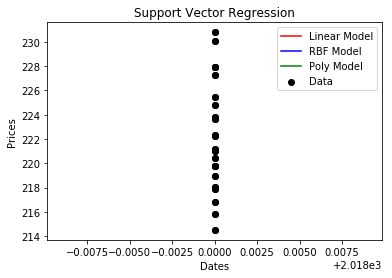

In [48]:
predicted_price = predict_prices(dates, prices, 51)  

In [49]:
print(predicted_price)

(221.6850055, 221.6850055, 221.6850055)
